In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.gridspec as gridspec

import scanpy as sc
import squidpy as sq

In [2]:
font_size = 6
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size, 'legend.fontsize':font_size, 
    'legend.loc': 'center right',
    'legend.borderpad':0,
    'legend.columnspacing': 0.5,
    'legend.labelspacing': 0.2,
    'legend.handletextpad': 0,
    'legend.borderaxespad': 0,
    'legend.handleheight': 0.5,
    'legend.handlelength': 1.0,}
sns.set(style='ticks',rc=rc) #talk, ticks, paper
sns.set_context("paper")

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign

centimeter = 1/2.54  # centimeter in inches

In [33]:
pvalue_lr = pd.read_csv('../result/cci/IDC/cci/IDC_pvalue_lr.csv', index_col=0)

In [34]:
pvalue_lr

,0|0,0|1,0|2,0|3,0|4,0|5,0|6,0|7,0|8,0|9,...,9|0,9|1,9|2,9|3,9|4,9|5,9|6,9|7,9|8,9|9
JAG2|NOTCH1,0.000000,1.000000,1.0,0.067027,1.0,0.000000,0.653164,1.0,0.000000,1.0,...,0.374464,1.0,1.0,1.0,1.000000,0.714448,1.0,1.000000,1.000000,1.0
DLL1|NOTCH1,0.000000,1.000000,1.0,0.705413,1.0,0.075665,1.000000,1.0,0.086296,1.0,...,0.000000,1.0,1.0,1.0,1.000000,0.457370,1.0,1.000000,1.000000,1.0
JAG1|NOTCH1,0.000000,1.000000,1.0,1.000000,1.0,0.259004,1.000000,1.0,0.539229,1.0,...,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0
TNF|NOTCH1,0.007061,1.000000,1.0,1.000000,1.0,0.520654,1.000000,1.0,1.000000,1.0,...,0.025418,1.0,1.0,1.0,1.000000,0.245855,1.0,1.000000,0.600703,1.0
DLL4|NOTCH1,0.000000,1.000000,1.0,0.378031,1.0,0.041562,1.000000,1.0,0.010754,1.0,...,0.025418,1.0,1.0,1.0,1.000000,0.367196,1.0,1.000000,0.840826,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MICB|KLRK1,1.000000,0.660362,1.0,1.000000,1.0,0.000000,1.000000,1.0,1.000000,1.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
CD177|PECAM1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD52|SIGLEC10,1.000000,1.000000,NaN,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.0,...,1.000000,1.0,NaN,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0
COPA|P2RY6,1.000000,1.000000,NaN,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.0,...,0.000000,0.0,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [35]:
clusters_lr_count = pd.DataFrame(columns=[['source', 'target', 'counts']])
for i in range(pvalue_lr.shape[1]):
    source_cluster = pvalue_lr.columns[i].split("|")[0]
    target_cluster = pvalue_lr.columns[i].split("|")[1]
    i_count_LR = (pvalue_lr.iloc[:,i] < 0.05).sum()
    clusters_lr_c_ = pd.DataFrame([[source_cluster, target_cluster, i_count_LR]], columns=[['source', 'target', 'counts']])
#     clusters_lr_count.append(clusters_lr_c_)
    clusters_lr_count = pd.concat([clusters_lr_count, clusters_lr_c_], axis=0, ignore_index=True)

In [36]:
clusters_lr_count

,source,target,counts
0,0,0,119
1,0,1,133
2,0,2,21
3,0,3,62
4,0,4,51
...,...,...,...
95,9,5,120
96,9,6,31
97,9,7,31
98,9,8,35


In [37]:
cluster_cluster_c = clusters_lr_count.iloc[:,-1].values.reshape(10,10)  ###counts

In [38]:
df = pd.DataFrame(cluster_cluster_c, 
                  index=np.unique(clusters_lr_count['source']).astype(int), 
                  columns=np.unique(clusters_lr_count['target']).astype(int))
df = df.astype(int)

In [39]:
df

,0,1,2,3,4,5,6,7,8,9
0,119,133,21,62,51,186,54,68,73,29
1,164,185,47,103,113,242,108,119,107,73
2,25,34,9,21,18,84,16,11,22,15
3,89,86,10,42,42,141,38,34,47,14
4,98,126,10,61,63,187,47,53,58,35
5,178,189,60,121,148,225,121,138,106,111
6,87,114,15,61,57,161,50,48,65,20
7,89,111,10,51,50,170,39,43,47,23
8,96,100,31,64,54,148,58,52,73,38
9,57,72,8,38,43,120,31,31,35,18


In [40]:
new_index = [0,8,2,3,9,5,1,7,6,4]         #np.arange(10)

df = df.reindex(new_index)              #.tolist()
df = df.reindex(columns=new_index)       #.tolist()

In [ ]:
domain_order=[0,8,2,3,9,5,1,7,6,4]

In [22]:
cluster_name = ['0',
'8',
'2',
'3',
'9',
'5',
'1',
'7',
'6',
'4',]

In [41]:
df

,0,8,2,3,9,5,1,7,6,4
0,119,73,21,62,29,186,133,68,54,51
8,96,73,31,64,38,148,100,52,58,54
2,25,22,9,21,15,84,34,11,16,18
3,89,47,10,42,14,141,86,34,38,42
9,57,35,8,38,18,120,72,31,31,43
5,178,106,60,121,111,225,189,138,121,148
1,164,107,47,103,73,242,185,119,108,113
7,89,47,10,51,23,170,111,43,39,50
6,87,65,15,61,20,161,114,48,50,57
4,98,58,10,61,35,187,126,53,47,63


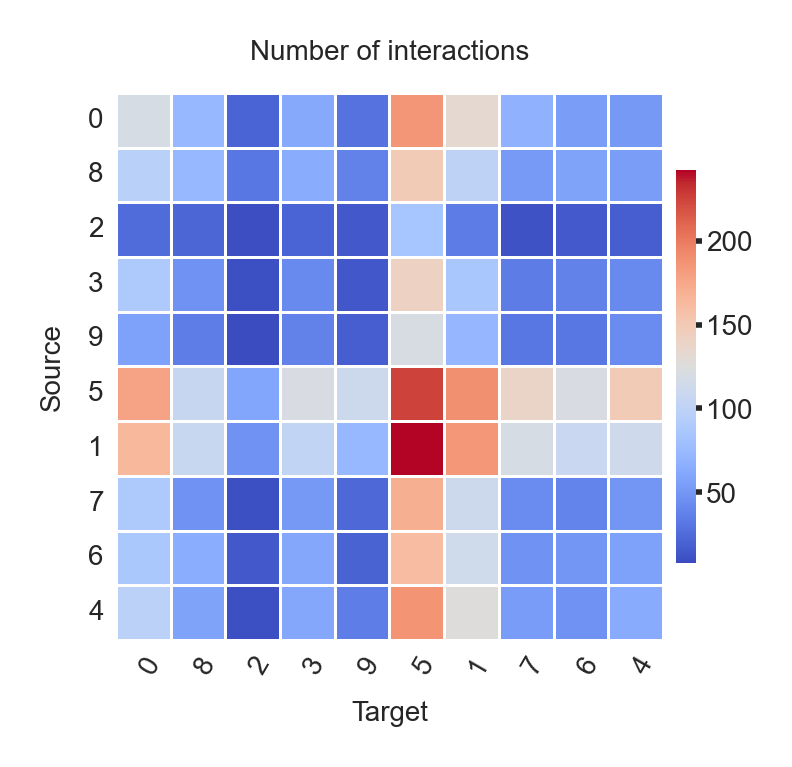

In [43]:
fig, ax_c = plt.subplots(figsize=(5.4*centimeter, 5.4*centimeter), dpi=400)

fig_C = sns.heatmap(df, 
                    linewidths=0.5, 
                    cmap = 'coolwarm', 
                    square = True, 
                    ax = ax_c, 
                    cbar_kws = {'shrink': 0.6, 'pad': 0.02},
                    annot = False,
                   )
ax_c.set_title("Number of interactions", fontsize=5)
ax_c.tick_params(direction='out', labelsize=5, length=2.0, width=0.25, 
               top=False, right=False, left=False, bottom=False, pad=0.2,
               grid_alpha=0, labelleft=True, labelright=False)
plt.yticks(fontsize=5, rotation=0)
plt.xticks(fontsize=5, rotation=60, ha='right', rotation_mode="anchor",)
plt.xlabel('Target', fontsize=5)
plt.ylabel('Source', fontsize=5)

cbar = fig_C.collections[0].colorbar
cbar.ax.tick_params(labelsize=5, length=1.0, pad=0.8)
plt.savefig('./Fig6_number_of_interactions_heatmap.pdf', bbox_inches='tight', format='pdf', dpi=400)